<a href="https://colab.research.google.com/github/rahatafshan/stock-price-prediction-project/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1iqLl61Un6HLYMJgmYcPcfWma2iqk6trF#scrollTo=X3SKcQ0xfNWd

**Stock Price Prediction using Linear Regression**

In [2]:
#!pip install yfinance pandas numpy matplotlib scikit-learn

In [20]:
#DAta Preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Load the CSV file
df = pd.read_csv("/content/AAPL_Stock_Price_data.csv")  # or use the uploaded file name

df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,2/27/2020,$273.52,80151380,$281.10,$286,$272.96
2,2/26/2020,$292.65,49678430,$286.53,$297.88,$286.50
3,2/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,2/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [22]:
# Check column names

print("Column names:")
print(df.columns.tolist())

Column names:
['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low']


In [23]:
# Remove extra spaces from column names
df.columns = df.columns.str.strip()


In [24]:
# Clean and Convert Columns

# Rename 'Close/Last' to 'Close' for easier access
df.rename(columns={'Close/Last': 'Close'}, inplace=True)

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Remove '$' and convert columns to float
for col in ['Close', 'Open', 'High', 'Low']:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

# Clean Volume column (remove commas, convert to int)
df['Volume'] = df['Volume'].replace(',', '', regex=True).astype(int)

# Sort by date
df = df.sort_values('Date').reset_index(drop=True)

# Preview cleaned data
df.head()


,Date,Close,Volume,Open,High,Low
0,2010-03-01,29.86,137312041,29.39,29.93,29.35
1,2010-03-02,29.84,141486282,29.99,30.12,29.68
2,2010-03-03,29.90,92846488,29.85,29.98,29.71
3,2010-03-04,30.10,89591907,29.90,30.13,29.80
4,2010-03-05,31.28,224647427,30.71,31.39,30.66


<ipython-input-26-8eeff30ebce8>:16: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


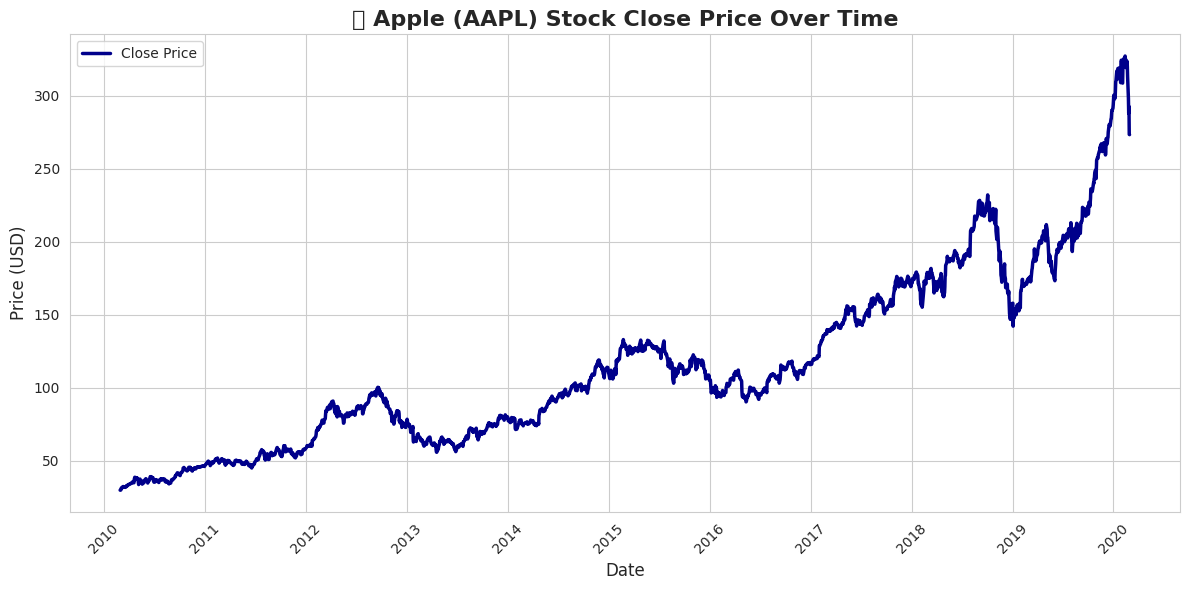

In [26]:
# Visualize Stock Price Trend

# Set a theme
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Plot line chart
plt.plot(df['Date'], df['Close'], color='darkblue', linewidth=2.5, label='Close Price')

# Customize chart
plt.title('📈 Apple (AAPL) Stock Close Price Over Time', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [28]:
# Prepare Data for Linear Regression

from sklearn.model_selection import train_test_split
import numpy as np

# Step 1: Convert dates to ordinal (numeric) for regression
df['Date_Ordinal'] = df['Date'].apply(lambda date: date.toordinal())

# Step 2: Create features (X) and target (y)
X = df[['Date_Ordinal']]
y = df['Close']

# Step 3: Split into training and testing data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show shapes
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 2014
Testing samples: 504


🔍 R² Score: 0.8515
📉 Mean Squared Error: 483.65


<ipython-input-29-6c0a43026b72>:28: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


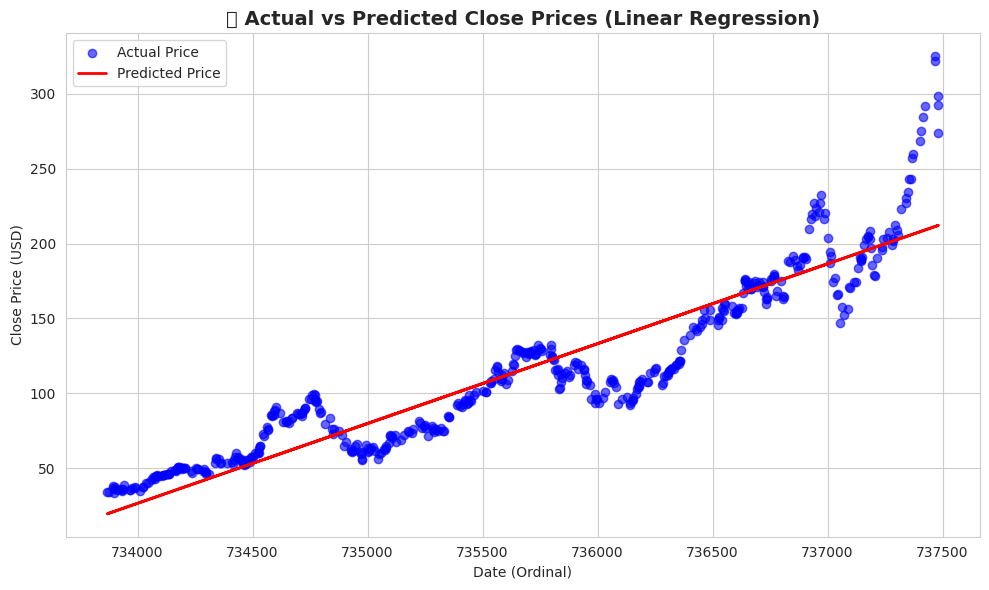

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 2: Predict on test data
y_pred = model.predict(X_test)

# Step 3: Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"🔍 R² Score: {r2:.4f}")
print(f"📉 Mean Squared Error: {mse:.2f}")

# Step 4: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Price', alpha=0.6)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Price')
plt.title('📊 Actual vs Predicted Close Prices (Linear Regression)', fontsize=14, weight='bold')
plt.xlabel('Date (Ordinal)')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-32-6328ee62a228>:32: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


📅 Future Date: June 01, 2025
📈 Predicted Apple (AAPL) Close Price: $314.36


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


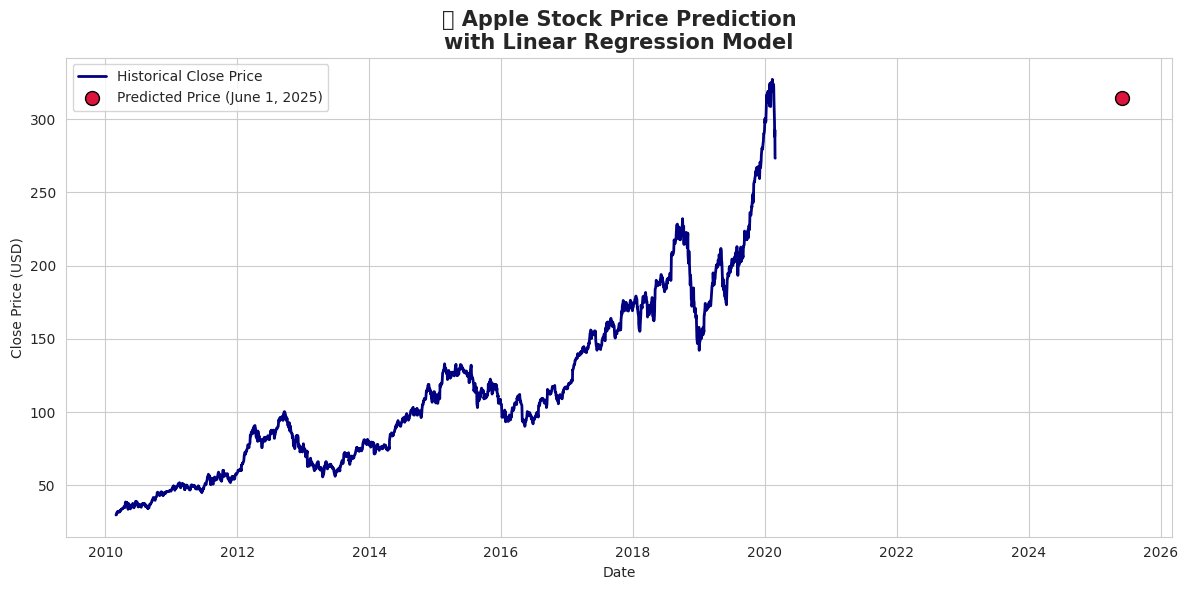

In [32]:
import datetime
import matplotlib.pyplot as plt

# Step 1: Choose future date
future_date = datetime.date(2025, 6, 1)
future_date_ordinal = np.array([[future_date.toordinal()]])

# Step 2: Predict using the trained model
future_price = model.predict(future_date_ordinal)[0]

# Step 3: Display prediction with emphasis
print("="*60)
print(f"📅 Future Date: {future_date.strftime('%B %d, %Y')}")
print(f"📈 Predicted Apple (AAPL) Close Price: ${future_price:.2f}")
print("="*60)

# Step 4: Plot prediction on top of historical data
plt.figure(figsize=(12, 6))

# Historical line
plt.plot(df['Date'], df['Close'], label='Historical Close Price', color='navy', linewidth=2)

# Predicted future point
plt.scatter(future_date, future_price, color='crimson', s=100, label='Predicted Price (June 1, 2025)', edgecolors='black', zorder=5)

# Final plot touch
plt.title('🔮 Apple Stock Price Prediction\nwith Linear Regression Model', fontsize=15, weight='bold')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
